# <font color=orange>感知机学习算法的原始形式</font>
<font size=4>
 输入：训练数据集$T=\{(x_1,y_1),(x_2,x_2),\cdots,(x_N,y_N)\}$,其中$x_i \in X = R^n$,$y_i \in Y =\{-1,+1\}$, $i=1,2,\cdots,N$;学习效率$\eta$.
>
> 输出：$w,b$;感知机模型$f(x)=sign(w \cdot x + b)$

> 1. 选取初值$w_0,b_0$
>
> 2. 在训练集中选取数据$(x_i,y_i)$
>
> 3. 如果$y_i(w\cdot x_i +b) \leqslant  0$
>    $$
>    w\leftarrow w+\eta y_i x_i \\
>    b \leftarrow b+\eta y_i
>    $$
>
> 4. 转至（2）,直到训练集中没有误分类点。

> <font color=red>注意：极小化的过程不是一次使$M$中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降</font>
> </font>

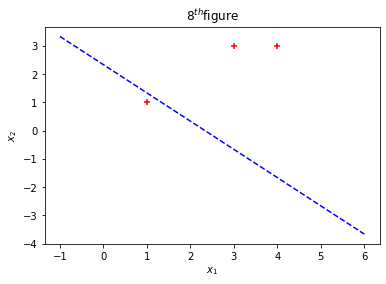

迭代8次


In [164]:
#代码实现
import numpy as np
from matplotlib import pyplot as plt

def plotfig(w,b,i):
    plt.figure()
    if w[0,0]!=0:
        xx2 = -b
        xx2=-b/w[0,0]-xx1
        plt.plot(xx1,xx2,color = 'blue',linestyle='--')
        plt.scatter(a[0,:],a[1,:],color='red',marker = '+')
        plt.title(str(i)+'$^{th}$'+'figure')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.show()
    else:
        print('\n')
    
    
#训练数据
a = np.array([[3,4,1],[3,3,1]])
y = np.array([1,1,-1])
[max_x1,max_x2] = np.amax(a,1)
[min_x1,min_x2] = np.amin(a,1)
xx1 = np.linspace(min_x1-2,max_x1+2,50)
xx2 = np.linspace(min_x2-2,max_x2+2,50)
#学习方法
w0 = np.ones([1,2])
b0 = 0
eta = 1
w = np.copy(w0)
b = np.copy(b0)
#每次生成一次，就画图验证观察
break_flag = False
for i in range(1,20):
    for j in range(a.shape[1]):
        if y[j]*(np.dot(w,a[:,j])+b) <=0:
            w = w + eta*y[j]*a[:,j]
            b = b + eta*y[j]
            break
        if j == a.shape[1]-1:
            break_flag = True
    if break_flag:
        break
plotfig(w,b,i)
print('迭代'+str(i)+'次')
            


# <font color=orange>感知机器学习对偶形式</font>
<font size=4>
 输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$,其中$x_i \in R^n$,$y_i \in \{-1,+1\}$,$i=1,2,\cdots,N$;学习率$\eta$（$0<\eta \leqslant 1$）；
>
> 输出:$a,b$;感知机模型$f(x)=sign({\sum^N_{j=1}{\alpha_j y_j x_j \cdot x+b}})$.其中$\alpha=(\alpha_1,\alpha_2,\cdots,\alpha_N)^T$，$b=\sum^N_{j=1}{\alpha_j y_j}$

> 1. $\alpha \leftarrow 0$,$b \leftarrow 0$
>
> 2. 在训练集中选取数据$(x_i,y_i)$
>
> 3. 如果$y_i (\sum^N_{j=1}{\alpha_j y_j x_j \cdot x_i + b}) \leqslant 0$
>    $$
>    \alpha \leftarrow \alpha_i + \eta \\
>    b \leftarrow b + \eta y_i
>    $$
>
> 4. 转至（2）直到没有误分类数据

> <font color=red>注意：对偶形式中训练实例仅以内积的形式出现</font>，为了方便，可以预先将训练集中实例间的内积计算出来并以矩阵的形式存储，即所谓的$Gram$矩阵
> $$
> G=[x_i \cdot x_j]_{N\times N}
> $$
> </font>

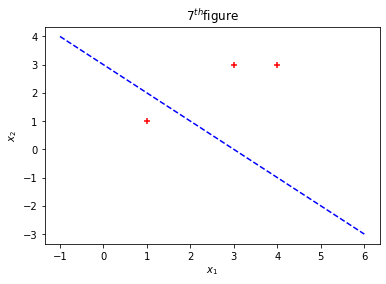

迭代7次


In [222]:
#代码实现
#代码实现
import numpy as np
from matplotlib import pyplot as plt

def plotfig(w,b,i):
    plt.figure()
    if w[0]!=0:
        xx2 = -b
        xx2=-b/w[0]-xx1
        plt.plot(xx1,xx2,color = 'blue',linestyle='--')
        plt.scatter(a[0,:],a[1,:],color='red',marker = '+')
        plt.title(str(i)+'$^{th}$'+'figure')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.show()
    else:
        print('\n')
    
    
#训练数据
a = np.array([[3,4,1],[3,3,1]])
y = np.array([1,1,-1])
[max_x1,max_x2] = np.amax(a,1)
[min_x1,min_x2] = np.amin(a,1)
xx1 = np.linspace(min_x1-2,max_x1+2,50)
xx2 = np.linspace(min_x2-2,max_x2+2,50)
#学习方法
alpha0= np.array([0,0,0])
b0 = 0
eta = 1
Gram = np.dot(a.T,a)
alpha = np.copy(alpha0)
b = np.copy(b0)
#每次生成一次，就画图验证观察
break_flag = False
for i in range(1,8):
    for j in range(a.shape[1]):
        if y[j]*(np.vdot(y*alpha,Gram[j,:])) <=0:
            alpha[j] = alpha[j] + eta
            b = b + eta*y[j]
            #w = np.dot(alpha*y,a.T)
            #plotfig(w,b,i)
            #print('迭代'+str(i)+'次')
            break
        if j == a.shape[1]-1:
            break_flag = True
    if break_flag:
        break
w = np.dot(alpha*y,a.T)
plotfig(w,b,i)
print('迭代'+str(i)+'次')

<font size=4>
<font color=red>上式的对称形式：</font>在实行的过程中，发现，虽然是在不断地修正，但是在得到满足条件的，仍继续执行，有问题。
</font>

<font size=4>
对照原始形式，结果一致，迭代步骤是相互对应的
</font>

# <font color=orange>搜索$kd$树</font>
<font size=4>
算法：用$kd$树的最近邻搜索

> 输入：已构造的$kd$树；目标点$x$;
>
> 输出：$x$的最近邻

> > 1. 在$kd$树中找出包含目标点$x$的叶结点：从根结点出发，递归地向下访问$kd$树。若目标$x$当前维的坐标小于切分点的坐标，则移动到左子结点，否则移动到右子结点，知道子结点为叶结点为止。
> >
> > 2. 以此叶结点为“当前最近点”
> >
> > 3. 递归地向上回退，在每个结点进行以下操作
> >
> > 4. 如果该结点保存的实例点比当前最近点距离目标点更近，则以该实例点为“当前最近点”。
> >
> > 5. 当前最近点一定存在于该结点一个子结点对应的区域。检查该子结点的父节点的另一子结点对应的区域是否有更近的点，具体地，检查另一个子结点对应的区域是否以目标点为求心，以目标点与“当前最近点”间的距离为半径的超球体相交。
> >
> >    如果相交，可能在另一个子结点对应的区域内存在距目标点最近的点，移动到另一个子结点，接着，递归地进行最近邻搜索。
> >
> >    如果不想交，向上回退。
> >
> > 6. 当回退到根结点时，搜素结束。最后的“当前最近点”即为$x$的最近邻点。
</font>

（0）轴维度的数据更离散，从x轴进行切分
[[5.890734825648706, 2.530888573895095], [[3.0662646718896704, 6.196780665497118], [[2.0624722119427705, 3.6010152929280794], [[1.2413506313442824, 4.2660463756436195], [[1.2413506313442824, 1.0591195846867352], [[0, 0], [[0, 0]], [[0, 0]]], [[0, 0], [[0, 0]], [[0, 0]]]], [[0, 0], [[0, 0]], [[0, 0]]]], [[4.813583195918593, 4.665079233369114], [[3.0662646718896704, 3.6010152929280794], [[0, 0], [[0, 0]], [[0, 0]]], [[0, 0], [[0, 0]], [[0, 0]]]], [[0, 0], [[0, 0]], [[0, 0]]]]], [[4.670354795923903, 8.248200537100557], [[2.5383101325120263, 7.363312377016186], [[1.8724139606244183, 7.012471683685123], [[0, 0], [[0, 0]], [[0, 0]]], [[0, 0], [[0, 0]], [[0, 0]]]], [[0, 0], [[0, 0]], [[0, 0]]]], [[5.567798708999635, 8.970217009446733], [[0, 0], [[0, 0]], [[0, 0]]], [[0, 0], [[0, 0]], [[0, 0]]]]]], [[7.791357724289467, 5.996589777958747], [[7.835368825030801, 4.549846259762105], [[7.386685448650651, 5.902163179981434], [[6.3718602120052275, 3.8893442327952066], [[0, 0], [[

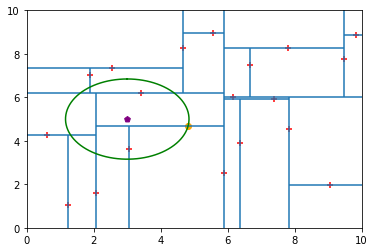

In [116]:
import numpy as np
import matplotlib.pyplot as plt
#接下来是对1轴进行切分，这里要同时对两边进行切分
def getmid(sam,j,min1,max1):
    mark=np.lexsort(sam[:1,:])
    newsam=sam[:,mark]
    mid = int(newsam.shape[1]/2)
    mid_num = newsam[0,mid]
    if j%2==1:
        plt.vlines(mid_num,min1,max1)
    else:
        plt.hlines(mid_num,min1,max1)
    lsam = newsam[:,:mid]
    rsam = newsam[:,(mid+1):]
    return lsam,rsam,mid_num

def getdiv(sam,min0,max0,min1,max1,j,TREE,TREE0):
#迭代
    if sam.size :
        lsam1,rsam1,mid_num=getmid(sam,j,min1,max1)
        Lsam1=lsam1[(1,0),:]
        Rsam1=rsam1[(1,0),:]
        #储存数据
        tree1 = [[0,0],[[0,0]],[[0,0]]]
        tree2 = [[0,0],[[0,0]],[[0,0]]]
        note = len(lsam1[0])
        if j%2==1:
           TREE[0][0]=mid_num
           TREE[0][1]=sam[1,note]
        else:
           TREE[0][1]=mid_num
           TREE[0][0]=sam[1,note]
        TL = TREE[1]#这里是地址指引第一个空格
        TR = TREE[2]
        TL[:]=tree1
        TR[:]=tree2

        ##只储存中位数
        tree10=[0,[0],[0]]
        tree20=[0,[0],[0]]
        TREE0[0]=mid_num
        TL0 = TREE0[1]
        TR0 = TREE0[2]
        TL0[:]=tree10
        TR0[:]=tree20

        return getdiv(Lsam1,min1,max1,min0,mid_num,j+1,TL,TL0),getdiv(Rsam1,min1,max1,mid_num,max0,j+1,TR,TR0)
    else:
        return '划分完毕'
        #if j%2==1: #取0轴
        #   return str(sam[0][0])
        #else:#取1轴
        #    return str(sam[1][0])

#代码实现
# 本案例是二维的问题，k=2
#训练实例
#具体生成的样本采用随机样本，限制样本范围
num = 20 #实例数目
A = 10 #实例取值范围
while 1:  #为了节省时间，直接取0轴方向切分更合理的方向
    samples=np.random.rand(2,num)*A
    if np.var(samples[0,:])>=np.var(samples[1,:]):
        print("（0）轴维度的数据更离散，从x轴进行切分")
        break
#如何选择切分的坐标轴
#书上的内容没看明白，书上是直接从x轴开切，没有讲清楚，从网上的资料查询知道一种方式就是求不容维度的
#的方差，可以试试,方差越大，说明越分散
max0=A
min0=0
max1=A
min1=0
#需要额外的容器来储存中位数

#对整体切分
plt.figure()
plt.xlim(min0,max0)
plt.ylim(min1,max1)
plt.scatter(samples[0,:],samples[1,:],color='red',marker='+',label='samples')
Tree = [[0,0],[[0,0]],[[0,0]]]
Tree0 = [0,[0],[0]]
getdiv(samples,min0,max0,min1,max1,1,Tree,Tree0)
print(Tree)  #格式：[父节，[左子节],[右子节]]，最后的[0,[0],[0]]是到底了，不存在的数据
print(Tree0)

#新的实例在图中找到最近点，通过KB树来按阶寻找
def findleave(le,j,new):
    if j%2==1:#该中位数在0轴上
       if new[0][0]<=le[0][0]:
           #判断在左分支
           lle = le[1]
           if lle[0]!=[0,0]:
               return findleave(lle,j+1,new)
           else:
               nearestpoint[:] = le[0]
               print('最近点是%s'%le[0])
       else:
           #判断在右分支
           rle = le[2]
           if rle[0]!=[0,0]:
               return findleave(rle,j+1,new)
           else:
               nearestpoint[:] = le[0]
               print('最近点是%s'%le[0])
    else: #说明中位数在1轴
        if new[1][0]<=le[0][1]:
            #判断在左分支
            lle =le[1]
            if lle[0]!=[0,0]:
                return findleave(lle,j+1,new)
            else:
                nearestpoint[:] = le[0]
                print('最近点是%s'%le[0])
        else:
            #判断在右分支
            rle =le[2]
            if  rle[0]!=[0,0]:
                return findleave(rle,j+1,new)
            else:
                nearestpoint[:] = le[0]
                print('最近点是%s'%le[0])
new = [[3],[5]]
nearestpoint = [0,0]
findleave(Tree,1,new)
plt.scatter(new[0][0],new[1][0],color='purple',marker='p')
plt.scatter(nearestpoint[0],nearestpoint[1],color='orange',marker='o')
r = np.sqrt(np.sum(np.square([new[0][0]-nearestpoint[0],new[1][0]-nearestpoint[1]])))
dt = np.linspace(0,2*np.pi,100)
x = r*np.sin(dt)+new[0][0]
y = r*np.cos(dt)+new[1][0]
plt.plot(x,y,color='green')

# <font color=green>观察</font>
<font size=4>通过$kb$图的从根部直接对比搜索得到的最近点，可以看出，该最近点并不是新的实例的最近点，需要往上继续查找
后面的查找的内容比较简单，这里就不多编程了，主要是想偷懒了...</font>